<a href="https://colab.research.google.com/github/snampally97/Assignment-Exercises/blob/main/Nampally_Srikanth_Assignment_3_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, ne_chunk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Function to scrape IMDB movie reviews
def scrape_imdb_reviews(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = []
    for review in soup.find_all('div', class_='text show-more__control'):
        review_text = review.text.strip()
        reviews.append(review_text)
    return reviews

# IMDB movie "Inception" user reviews URL
imdb_url = 'https://www.imdb.com/title/tt1375666/reviews'

# Scrape IMDB movie reviews
reviews = scrape_imdb_reviews(imdb_url)

# Convert to DataFrame and save to CSV
df = pd.DataFrame(reviews, columns=['review_text'])
df.to_csv('imdb_reviews.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
import re
import pandas as pd
from collections import Counter

# Load the IMDB reviews dataset
df = pd.read_csv('imdb_reviews.csv')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

def generate_ngrams(text, n):
    words = text.split()
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

def count_ngrams(ngrams):
    ngram_counts = Counter(ngrams)
    return ngram_counts

def calculate_bigram_probabilities(ngrams):
    unigram_counts = Counter(ngram[0] for ngram in ngrams)
    bigram_probabilities = {bigram: ngram_counts[bigram] / unigram_counts[bigram[0]] for bigram, count in ngram_counts.items()}
    return bigram_probabilities

def extract_noun_phrases(text):
    tagged_text = pos_tag(word_tokenize(text))
    chunked_text = ne_chunk(tagged_text)
    noun_phrases = []
    for subtree in chunked_text:
        if isinstance(subtree, nltk.Tree) and subtree.label() == 'NP':
            noun_phrase = ' '.join(word for word, tag in subtree.leaves())
            noun_phrases.append(noun_phrase)
    return noun_phrases

def calculate_relative_probabilities(reviews):
    all_noun_phrases = [extract_noun_phrases(review) for review in reviews]
    phrase_counts = Counter(phrase for phrases in all_noun_phrases for phrase in phrases)

    # Check if phrase_counts is empty
    if not phrase_counts:
        return []

    max_frequency = max(phrase_counts.values())
    relative_probabilities = [{phrase: phrase_counts[phrase] / max_frequency for phrase in phrases} for phrases in all_noun_phrases]
    return relative_probabilities

def print_relative_probabilities(relative_probabilities, phrase_counts):
    phrase_strings = [' '.join(phrase) for phrase in phrase_counts]
    print("Review\t\t" + "\t\t".join(phrase_strings))
    for i, probs in enumerate(relative_probabilities):
        print(f"Review {i+1}:\t" + "\t\t".join(f"{probs.get(phrase, 0):.2f}" for phrase in phrase_strings))


# Preprocess reviews
preprocessed_reviews = [preprocess_text(review) for review in df['review_text']]

# Generate trigrams
n = 3
all_ngrams = [generate_ngrams(review, n) for review in preprocessed_reviews]
ngram_counts = count_ngrams([ngram for ngrams in all_ngrams for ngram in ngrams])

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities([ngram for ngrams in all_ngrams for ngram in ngrams])

# Calculate relative probabilities of noun phrases
relative_probabilities = calculate_relative_probabilities(df['review_text'])

# Print results
print("Frequency of all trigrams:")
print(ngram_counts)
print("\nBigram probabilities:")
print(bigram_probabilities)
print("\nRelative probabilities of noun phrases:")
print_relative_probabilities(relative_probabilities, ngram_counts.keys())

Frequency of all trigrams:
Counter({('one', 'of', 'the'): 10, ('of', 'the', 'film'): 10, ('is', 'a', 'film'): 7, ('the', 'dark', 'knight'): 6, ('of', 'the', 'most'): 6, ('a', 'lot', 'of'): 6, ('in', 'this', 'film'): 6, ('this', 'is', 'a'): 6, ('a', 'film', 'that'): 6, ('is', 'one', 'of'): 6, ('2001', 'a', 'space'): 5, ('a', 'space', 'odyssey'): 5, ('this', 'film', 'is'): 5, ('in', 'my', 'opinion'): 4, ('of', 'all', 'time'): 4, ('of', 'the', 'movie'): 4, ('to', 'watch', 'this'): 4, ('it', 'is', 'a'): 4, ('one', 'of', 'my'): 4, ('the', 'special', 'effects'): 4, ('inception', 'is', 'a'): 4, ('some', 'of', 'the'): 4, ('of', 'the', 'best'): 4, ('the', 'film', 'is'): 4, ('at', 'the', 'same'): 4, ('the', 'same', 'time'): 4, ('is', 'a', 'very'): 4, ('in', 'the', 'film'): 4, ('on', 'the', 'big'): 3, ('the', 'big', 'screen'): 3, ('in', 'the', 'cinema'): 3, ('arthur', 'joseph', 'gordonlevitt'): 3, ('to', 'plant', 'an'): 3, ('an', 'idea', 'in'): 3, ('dream', 'within', 'a'): 3, ('within', 'a', 'dre

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import math

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Calculate term frequency (TF)
def calculate_tf(text):
    words = text.split()
    word_count = len(words)
    tf = {word: words.count(word) / word_count for word in words}
    return tf

# Calculate inverse document frequency (IDF)
def calculate_idf(documents, term):
    document_count = len(documents)
    term_occurrences = sum(1 for doc in documents if term in doc)
    return math.log(document_count / term_occurrences) if term_occurrences > 0 else 0

# Build TF-IDF matrix
def build_tf_idf_matrix(documents):
    tf_idf_matrix = {}
    for i, document in enumerate(documents, start=1):
        tf = calculate_tf(document)
        for term, tf_value in tf.items():
            idf = calculate_idf(documents, term)
            tf_idf_matrix.setdefault(i, {})[term] = tf_value * idf
    return tf_idf_matrix

# Calculate cosine similarity between two vectors
def cosine_similarity(vector1, vector2):
    dot_product = sum(vector1[term] * vector2[term] for term in vector1 if term in vector2)
    magnitude1 = math.sqrt(sum(value ** 2 for value in vector1.values()))
    magnitude2 = math.sqrt(sum(value ** 2 for value in vector2.values()))
    return dot_product / (magnitude1 * magnitude2) if magnitude1 * magnitude2 > 0 else 0

# Rank documents with respect to query
def rank_documents(query, documents, tf_idf_matrix):
    query_tf = calculate_tf(query)
    query_vector = {term: query_tf[term] * calculate_idf(documents, term) for term in query_tf}
    document_scores = {}
    for doc_id, doc_vector in tf_idf_matrix.items():
        document_scores[doc_id] = cosine_similarity(query_vector, doc_vector)
    ranked_documents = sorted(document_scores.items(), key=lambda x: x[1], reverse=True)
    return ranked_documents

# Preprocess documents
preprocessed_documents = [preprocess_text(review) for review in df['review_text']]

# Build TF-IDF matrix
tf_idf_matrix = build_tf_idf_matrix(preprocessed_documents)

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"

# Rank documents with respect to the query
ranked_documents = rank_documents(preprocess_text(query), preprocessed_documents, tf_idf_matrix)

# Print the ranked documents
print("Rank\tDocument ID\tCosine Similarity")
for i, (doc_id, similarity) in enumerate(ranked_documents, start=1):
    print(f"{i}\t{doc_id}\t\t{similarity:.4f}")

Rank	Document ID	Cosine Similarity
1	15		0.1295
2	1		0.0440
3	7		0.0438
4	12		0.0379
5	20		0.0141
6	13		0.0137
7	18		0.0125
8	14		0.0089
9	8		0.0086
10	24		0.0078
11	21		0.0058
12	23		0.0056
13	22		0.0052
14	25		0.0049
15	2		0.0048
16	9		0.0036
17	16		0.0026
18	4		0.0017
19	17		0.0014
20	10		0.0010
21	5		0.0008
22	19		0.0005
23	6		0.0005
24	3		0.0000
25	11		0.0000


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

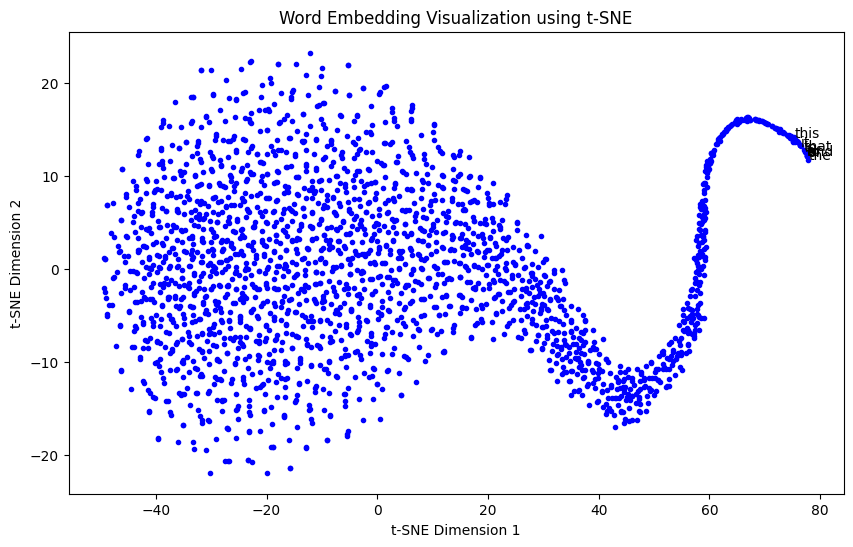

In [ ]:
import pandas as pd
import re
import multiprocessing
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('imdb_reviews.csv')

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.split()

# Preprocess and tokenize all reviews
preprocessed_reviews = [preprocess_text(review) for review in df['review_text']]

# Train Word2Vec model
cores = multiprocessing.cpu_count()  # Count the number of CPU cores for parallelization
model = Word2Vec(sentences=preprocessed_reviews, vector_size=300, window=5, min_count=1, workers=cores)

# Visualize the Word2Vec model using t-SNE
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

# Convert list of vectors to 2D array
vectors_2d = np.array(vectors)

tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(vectors_2d)

# Plot word vectors in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='.', color='b')

# Add annotations for some words
num_words_to_annotate = 10
for i, word in enumerate(words[:num_words_to_annotate]):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Word Embedding Visualization using t-SNE')
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/snampally97/assignment-reviews/tree/032efb4dca28b93c5ff3a914d70066ca03d031f7



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
All things considered, this assignment has improved my comprehension of managing text data from its initial collection to its final analysis. I felt more comfortable applying the skills to address problems in the real world and was able to comprehend the content better because the projects were practical. and also collecting sentiment, document_id, and clean data to create a dataset from earlier assignments for important information